In [2]:
from alphas import *
import numpy as np
import pandas as pd
from simulation import *

In [25]:
data = pd.read_csv('../data/stocks/AAPL.csv', parse_dates=['Date'])

In [26]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600
...,...,...,...,...,...,...,...
11020,2024-08-30,230.190002,230.399994,227.479996,229.000000,229.000000,52990800
11021,2024-09-03,228.550003,229.000000,221.169998,222.770004,222.770004,50042900
11022,2024-09-04,221.660004,221.779999,217.479996,220.850006,220.850006,43840200
11023,2024-09-05,221.630005,225.479996,221.520004,222.380005,222.380005,36615400


In [32]:
data["alpha"] = momentum(data)

In [33]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,alpha
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,NaN
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,NaN
...,...,...,...,...,...,...,...,...
11020,2024-08-30,230.190002,230.399994,227.479996,229.000000,229.000000,52990800,0.042792
11021,2024-09-03,228.550003,229.000000,221.169998,222.770004,222.770004,50042900,0.063754
11022,2024-09-04,221.660004,221.779999,217.479996,220.850006,220.850006,43840200,0.064884
11023,2024-09-05,221.630005,225.479996,221.520004,222.380005,222.380005,36615400,0.059313


In [34]:
data["alpha"].describe()

count    11005.000000
mean         0.021334
std          0.124405
min         -0.865100
25%         -0.049255
50%          0.024248
75%          0.095808
max          0.863516
Name: alpha, dtype: float64

<Axes: >

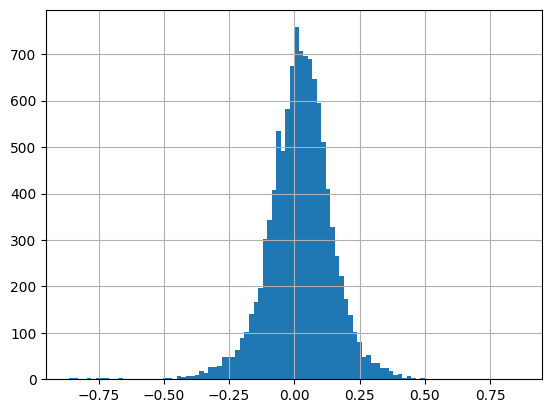

In [35]:
data["alpha"].hist(bins=100)

In [36]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,alpha
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,NaN
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,NaN
...,...,...,...,...,...,...,...,...
11020,2024-08-30,230.190002,230.399994,227.479996,229.000000,229.000000,52990800,0.042792
11021,2024-09-03,228.550003,229.000000,221.169998,222.770004,222.770004,50042900,0.063754
11022,2024-09-04,221.660004,221.779999,217.479996,220.850006,220.850006,43840200,0.064884
11023,2024-09-05,221.630005,225.479996,221.520004,222.380005,222.380005,36615400,0.059313


In [56]:
data['returns'] = data['Close'].pct_change()

In [57]:
filtered_df = data[data["Date"] >= '2010-01-01']

<Axes: >

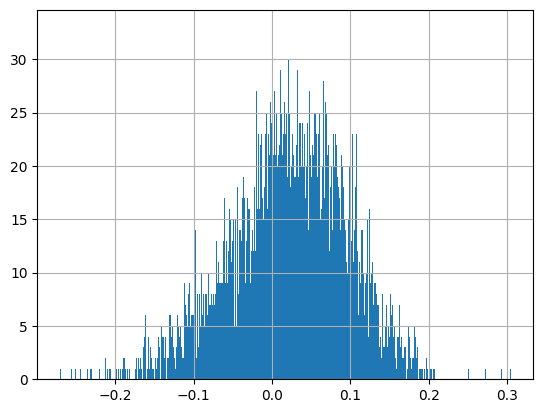

In [58]:
filtered_df["alpha"].hist(bins=500)

In [59]:
filtered_df["alpha"].describe()

count    3694.000000
mean        0.021819
std         0.075038
min        -0.270505
25%        -0.023635
50%         0.024737
75%         0.074495
max         0.304659
Name: alpha, dtype: float64

In [60]:
large_momentum = 0.074495
test = filtered_df['alpha'] >= large_momentum

In [61]:
filtered_df = filtered_df.assign(momentum=test)

In [62]:
filtered_df

,Date,Open,High,Low,Close,Adj Close,Volume,alpha,returns,momentum
7331,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454506,493729600,0.088385,0.015565,True
7332,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465664,601904800,0.106197,0.001729,True
7333,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362821,552160000,0.112896,-0.015906,True
7334,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200,0.106178,-0.001849,True
7335,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800,0.071061,0.006648,False
...,...,...,...,...,...,...,...,...,...,...
11020,2024-08-30,230.190002,230.399994,227.479996,229.000000,229.000000,52990800,0.042792,-0.003438,False
11021,2024-09-03,228.550003,229.000000,221.169998,222.770004,222.770004,50042900,0.063754,-0.027205,False
11022,2024-09-04,221.660004,221.779999,217.479996,220.850006,220.850006,43840200,0.064884,-0.008619,False
11023,2024-09-05,221.630005,225.479996,221.520004,222.380005,222.380005,36615400,0.059313,0.006928,False


In [65]:
filtered_df['performance'] = filtered_df['momentum'] * filtered_df['returns'].shift(-1)

In [66]:
filtered_df

,Date,Open,High,Low,Close,Adj Close,Volume,alpha,returns,momentum,performance
7331,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454506,493729600,0.088385,0.015565,True,0.001729
7332,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465664,601904800,0.106197,0.001729,True,-0.015906
7333,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362821,552160000,0.112896,-0.015906,True,-0.001849
7334,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351057,477131200,0.106178,-0.001849,True,0.006648
7335,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800,0.071061,0.006648,False,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...
11020,2024-08-30,230.190002,230.399994,227.479996,229.000000,229.000000,52990800,0.042792,-0.003438,False,-0.000000
11021,2024-09-03,228.550003,229.000000,221.169998,222.770004,222.770004,50042900,0.063754,-0.027205,False,-0.000000
11022,2024-09-04,221.660004,221.779999,217.479996,220.850006,220.850006,43840200,0.064884,-0.008619,False,0.000000
11023,2024-09-05,221.630005,225.479996,221.520004,222.380005,222.380005,36615400,0.059313,0.006928,False,-0.000000


In [67]:
filtered_df.replace(0.000000, np.nan, inplace=True)

<Axes: >

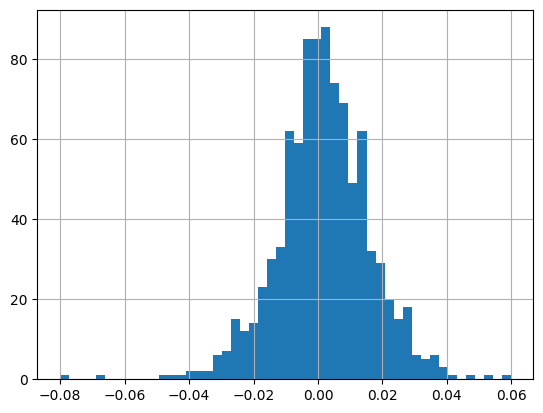

In [71]:
filtered_df['performance'].hist(bins=50)

In [72]:
filtered_df['performance'].describe()

count    922.000000
mean       0.001738
std        0.014391
min       -0.080061
25%       -0.006492
50%        0.001735
75%        0.010503
max        0.059814
Name: performance, dtype: float64

In [73]:
filtered_df['performance'].sum()

np.float64(1.6028041493390282)